In [30]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score,auc ,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder 

In [31]:
df_tr = pd.read_csv("../Loan Dataset/train.csv")
df_tr.head()

id  person_age  person_income  ... cb_person_default_on_file  cb_person_cred_hist_length loan_status
0   0          37          35000  ...                         N                          14           0
1   1          22          56000  ...                         N                           2           0
2   2          29          28800  ...                         N                          10           0
3   3          30          70000  ...                         N                           5           0
4   4          22          60000  ...                         N                           3           0

[5 rows x 13 columns]

In [32]:
df_tr.describe()

id    person_age  person_income  ...  loan_percent_income  cb_person_cred_hist_length   loan_status
count  58645.000000  58645.000000   5.864500e+04  ...         58645.000000                58645.000000  58645.000000
mean   29322.000000     27.550857   6.404617e+04  ...             0.159238                    5.813556      0.142382
std    16929.497605      6.033216   3.793111e+04  ...             0.091692                    4.029196      0.349445
min        0.000000     20.000000   4.200000e+03  ...             0.000000                    2.000000      0.000000
25%    14661.000000     23.000000   4.200000e+04  ...             0.090000                    3.000000      0.000000
50%    29322.000000     26.000000   5.800000e+04  ...             0.140000                    4.000000      0.000000
75%    43983.000000     30.000000   7.560000e+04  ...             0.210000                    8.000000      0.000000
max    58644.000000    123.000000   1.900000e+06  ...             0.830000                   30.000000      1.000000

[8 rows x 9 columns]

In [33]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [34]:
#Dropping id Feature
df1 = df_tr.drop(columns=["id"],axis=1)

In [35]:
df1.head()

person_age  person_income person_home_ownership  ...  cb_person_default_on_file cb_person_cred_hist_length loan_status
0          37          35000                  RENT  ...                          N                         14           0
1          22          56000                   OWN  ...                          N                          2           0
2          29          28800                   OWN  ...                          N                         10           0
3          30          70000                  RENT  ...                          N                          5           0
4          22          60000                  RENT  ...                          N                          3           0

[5 rows x 12 columns]

In [36]:
df1["loan_intent"].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [37]:
# Define category mappings with rankings
home_ownership_map = {"OTHER": 0, "RENT": 1, "MORTGAGE": 2, "OWN": 3}
loan_grade_map = {"G": 0, "F": 1, "E": 2, "D": 3, "C": 4, "B": 5, "A": 6}
loan_intent_map = {"VENTURE": 0, "PERSONAL": 1, "MEDICAL": 2, "HOMEIMPROVEMENT": 3, "DEBTCONSOLIDATION": 4, "EDUCATION": 5}
default_map = {"N": 0, "Y": 1}

# Apply mappings
df1["person_home_ownership"] = df1["person_home_ownership"].map(home_ownership_map)
df1["loan_grade"] = df1["loan_grade"].map(loan_grade_map)
df1["loan_intent"] = df1["loan_intent"].map(loan_intent_map)
df1["cb_person_default_on_file"] = df1["cb_person_default_on_file"].map(default_map)

In [38]:
df1.head()

person_age  person_income  person_home_ownership  ...  cb_person_default_on_file  cb_person_cred_hist_length  loan_status
0          37          35000                      1  ...                          0                          14            0
1          22          56000                      3  ...                          0                           2            0
2          29          28800                      3  ...                          0                          10            0
3          30          70000                      1  ...                          0                           5            0
4          22          60000                      1  ...                          0                           3            0

[5 rows x 12 columns]

In [39]:
df1.corr()

person_age  person_income  ...  cb_person_cred_hist_length  loan_status
person_age                    1.000000       0.102176  ...                    0.874260    -0.001130
person_income                 0.102176       1.000000  ...                    0.082727    -0.169956
person_home_ownership         0.046399       0.200921  ...                    0.042641    -0.232966
person_emp_length             0.121276       0.164042  ...                    0.102842    -0.100428
loan_intent                  -0.086986      -0.004941  ...                   -0.076785     0.023731
loan_grade                   -0.016497       0.059279  ...                   -0.012276    -0.385908
loan_amnt                     0.050378       0.310942  ...                    0.045720     0.144982
loan_int_rate                 0.009653      -0.057611  ...                    0.007535     0.338948
loan_percent_income          -0.031975      -0.280314  ...                   -0.023202     0.378280
cb_person_default_on_file     0.004408      -0.035514  ...                    0.004886     0.186962
cb_person_cred_hist_length    0.874260       0.082727  ...                    1.000000    -0.003030
loan_status                  -0.001130      -0.169956  ...                   -0.003030     1.000000

[12 rows x 12 columns]

In [56]:
#Scaling 
X = df1.drop(columns=["loan_status"])  # Features
y = df1["loan_status"]  # Target

# Standardize only features
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [57]:
X1.head()

person_age  person_income  ...  cb_person_default_on_file  cb_person_cred_hist_length
0    1.566200      -0.765768  ...                  -0.417419                    2.031798
1   -0.920057      -0.212128  ...                  -0.417419                   -0.946489
2    0.240196      -0.929223  ...                  -0.417419                    1.039036
3    0.405947       0.156966  ...                  -0.417419                   -0.201917
4   -0.920057      -0.106673  ...                  -0.417419                   -0.698298

[5 rows x 11 columns]

In [58]:
X1.corr()

person_age  person_income  ...  cb_person_default_on_file  cb_person_cred_hist_length
person_age                    1.000000       0.102176  ...                   0.004408                    0.874260
person_income                 0.102176       1.000000  ...                  -0.035514                    0.082727
person_home_ownership         0.046399       0.200921  ...                  -0.078637                    0.042641
person_emp_length             0.121276       0.164042  ...                  -0.054467                    0.102842
loan_intent                  -0.086986      -0.004941  ...                   0.009478                   -0.076785
loan_grade                   -0.016497       0.059279  ...                  -0.550677                   -0.012276
loan_amnt                     0.050378       0.310942  ...                   0.020271                    0.045720
loan_int_rate                 0.009653      -0.057611  ...                   0.501841                    0.007535
loan_percent_income          -0.031975      -0.280314  ...                   0.042979                   -0.023202
cb_person_default_on_file     0.004408      -0.035514  ...                   1.000000                    0.004886
cb_person_cred_hist_length    0.874260       0.082727  ...                   0.004886                    1.000000

[11 rows x 11 columns]

<Axes: >

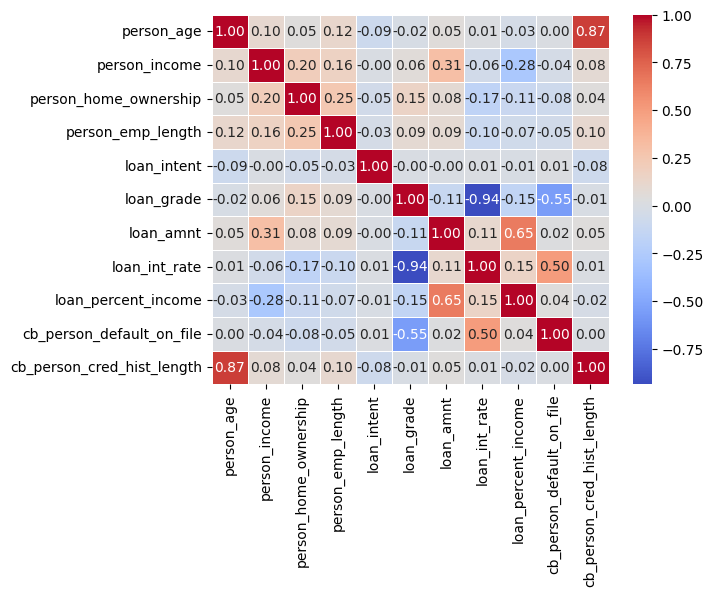

In [61]:
sns.heatmap(X1.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

<Axes: >

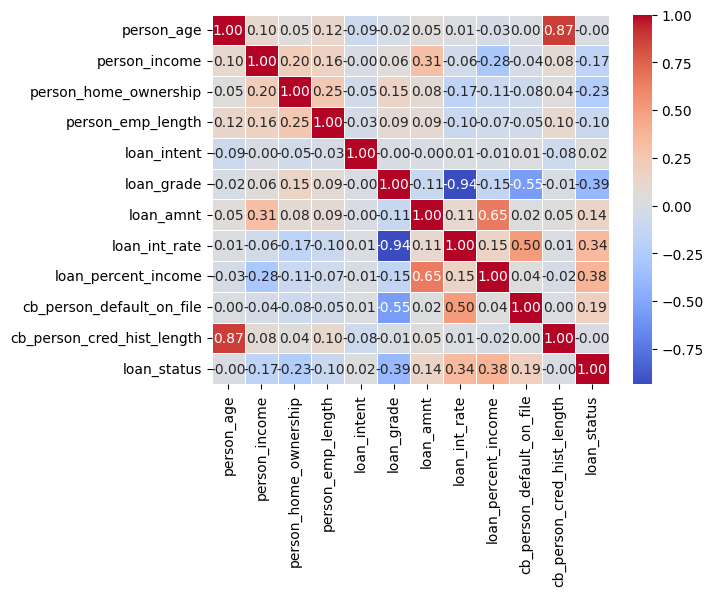

In [62]:
sns.heatmap(X1.join(y).corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

In [63]:
X2 = X1.drop(columns=["person_age"])


In [64]:
X2.head()

person_income  person_home_ownership  ...  cb_person_default_on_file  cb_person_cred_hist_length
0      -0.765768              -0.882272  ...                  -0.417419                    2.031798
1      -0.212128               2.454664  ...                  -0.417419                   -0.946489
2      -0.929223               2.454664  ...                  -0.417419                    1.039036
3       0.156966              -0.882272  ...                  -0.417419                   -0.201917
4      -0.106673              -0.882272  ...                  -0.417419                   -0.698298

[5 rows x 10 columns]

In [65]:
from scipy.stats import pointbiserialr

# Compute Point-Biserial Correlation for each numerical feature with loan_status
for col in X2.columns:
    corr, p_value = pointbiserialr(X2[col], y)  # X3 is your standardized features, y is loan_status
    print(f"{col}: Correlation = {corr:.4f}, p-value = {p_value:.4f}")


person_income: Correlation = -0.1700, p-value = 0.0000
person_home_ownership: Correlation = -0.2330, p-value = 0.0000
person_emp_length: Correlation = -0.1004, p-value = 0.0000
loan_intent: Correlation = 0.0237, p-value = 0.0000
loan_grade: Correlation = -0.3859, p-value = 0.0000
loan_amnt: Correlation = 0.1450, p-value = 0.0000
loan_int_rate: Correlation = 0.3389, p-value = 0.0000
loan_percent_income: Correlation = 0.3783, p-value = 0.0000
cb_person_default_on_file: Correlation = 0.1870, p-value = 0.0000
cb_person_cred_hist_length: Correlation = -0.0030, p-value = 0.4631


In [66]:
from scipy.stats import pointbiserialr

# Compute Point-Biserial Correlation for each numerical feature with loan_status
for col in X1.columns:
    corr, p_value = pointbiserialr(X1[col], y)  # X3 is your standardized features, y is loan_status
    print(f"{col}: Correlation = {corr:.4f}, p-value = {p_value:.4f}")


person_age: Correlation = -0.0011, p-value = 0.7844
person_income: Correlation = -0.1700, p-value = 0.0000
person_home_ownership: Correlation = -0.2330, p-value = 0.0000
person_emp_length: Correlation = -0.1004, p-value = 0.0000
loan_intent: Correlation = 0.0237, p-value = 0.0000
loan_grade: Correlation = -0.3859, p-value = 0.0000
loan_amnt: Correlation = 0.1450, p-value = 0.0000
loan_int_rate: Correlation = 0.3389, p-value = 0.0000
loan_percent_income: Correlation = 0.3783, p-value = 0.0000
cb_person_default_on_file: Correlation = 0.1870, p-value = 0.0000
cb_person_cred_hist_length: Correlation = -0.0030, p-value = 0.4631


In [67]:
#Dropping 
X3 = X2.drop(columns=["cb_person_cred_hist_length"])

In [68]:
X3.head()

person_income  person_home_ownership  ...  loan_percent_income  cb_person_default_on_file
0      -0.765768              -0.882272  ...             0.117378                  -0.417419
1      -0.212128               2.454664  ...            -0.973242                  -0.417419
2      -0.929223               2.454664  ...             0.553626                  -0.417419
3       0.156966              -0.882272  ...             0.117378                  -0.417419
4      -0.106673              -0.882272  ...            -0.646056                  -0.417419

[5 rows x 9 columns]

loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


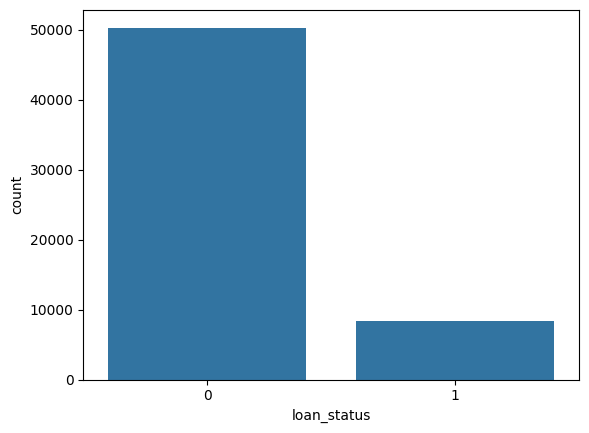

In [69]:
import seaborn as sns

sns.countplot(x=y)  # y is your target variable (loan_status)
print(y.value_counts(normalize=True))  # Check class distribution


In [70]:
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X3, y)  # X3 is your standardized dataset
feature_importance = pd.Series(importance, index=X3.columns).sort_values(ascending=False)
print(feature_importance)


person_income                0.095347
loan_int_rate                0.081569
loan_percent_income          0.081181
loan_grade                   0.080378
person_home_ownership        0.036566
cb_person_default_on_file    0.016793
loan_amnt                    0.014910
person_emp_length            0.008981
loan_intent                  0.007868
dtype: float64


In [71]:
X4 = X3.drop(columns=["loan_intent", "person_emp_length"])

In [72]:
X4.head()

person_income  person_home_ownership  loan_grade  ...  loan_int_rate  loan_percent_income  cb_person_default_on_file
0      -0.765768              -0.882272    0.063697  ...       0.267616             0.117378                  -0.417419
1      -0.212128               2.454664   -0.892168  ...       0.880532            -0.973242                  -0.417419
2      -0.929223               2.454664    1.019563  ...      -0.585854             0.553626                  -0.417419
3       0.156966              -0.882272    0.063697  ...       0.142396             0.117378                  -0.417419
4      -0.106673              -0.882272    1.019563  ...      -1.238314            -0.646056                  -0.417419

[5 rows x 7 columns]

### Feature Extraction


In [73]:
X4["total_loan_cost"] = X4["loan_amnt"] * (1 + X4["loan_int_rate"])

In [74]:
X4["risk_factor"] = X4["loan_grade"] * (X4["cb_person_default_on_file"] + 1)


In [75]:
X4.head()

person_income  person_home_ownership  loan_grade  ...  cb_person_default_on_file  total_loan_cost  risk_factor
0      -0.765768              -0.882272    0.063697  ...                  -0.417419        -0.733070     0.037109
1      -0.212128               2.454664   -0.892168  ...                  -0.417419        -1.763517    -0.519760
2      -0.929223               2.454664    1.019563  ...                  -0.417419        -0.239503     0.593978
3       0.156966              -0.882272    0.063697  ...                  -0.417419         0.571314     0.037109
4      -0.106673              -0.882272    1.019563  ...                  -0.417419         0.137818     0.593978

[5 rows x 9 columns]

In [79]:
X4.join(y).corr()

person_income  person_home_ownership  loan_grade  ...  total_loan_cost  risk_factor  loan_status
person_income                   1.000000               0.200921    0.059279  ...         0.233127     0.044466    -0.169956
person_home_ownership           0.200921               1.000000    0.152168  ...         0.073108     0.101503    -0.232966
loan_grade                      0.059279               0.152168    1.000000  ...        -0.109926     0.779356    -0.385908
loan_amnt                       0.310942               0.078978   -0.113273  ...         0.773115    -0.073744     0.144982
loan_int_rate                  -0.057611              -0.166437   -0.935837  ...         0.080405    -0.691183     0.338948
loan_percent_income            -0.280314              -0.110766   -0.153865  ...         0.485765    -0.102596     0.378280
cb_person_default_on_file      -0.035514              -0.078637   -0.550677  ...         0.014204    -0.863576     0.186962
total_loan_cost                 0.233127               0.073108   -0.109926  ...         1.000000    -0.087897     0.113823
risk_factor                     0.044466               0.101503    0.779356  ...        -0.087897     1.000000    -0.329911
loan_status                    -0.169956              -0.232966   -0.385908  ...         0.113823    -0.329911     1.000000

[10 rows x 10 columns]

In [78]:
from scipy.stats import pointbiserialr

# Compute Point-Biserial Correlation for each numerical feature with loan_status
for col in X4.columns:
    corr, p_value = pointbiserialr(X4[col], y)  # X3 is your standardized features, y is loan_status
    print(f"{col}: Correlation = {corr:.4f}, p-value = {p_value:.4f}")


person_income: Correlation = -0.1700, p-value = 0.0000
person_home_ownership: Correlation = -0.2330, p-value = 0.0000
loan_grade: Correlation = -0.3859, p-value = 0.0000
loan_amnt: Correlation = 0.1450, p-value = 0.0000
loan_int_rate: Correlation = 0.3389, p-value = 0.0000
loan_percent_income: Correlation = 0.3783, p-value = 0.0000
cb_person_default_on_file: Correlation = 0.1870, p-value = 0.0000
total_loan_cost: Correlation = 0.1138, p-value = 0.0000
risk_factor: Correlation = -0.3299, p-value = 0.0000


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]

print(vif_data)


                     Feature        VIF
0              person_income   1.996620
1      person_home_ownership   1.085631
2                 loan_grade  10.931229
3                  loan_amnt   4.901037
4              loan_int_rate   8.488066
5        loan_percent_income   3.144056
6  cb_person_default_on_file   3.426149
7            total_loan_cost   2.562355
8                risk_factor   5.554655


In [81]:
X5 = X4.drop(columns=["loan_grade"])

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X5.columns
vif_data["VIF"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]

print(vif_data)


                     Feature       VIF
0              person_income  1.996595
1      person_home_ownership  1.085621
2                  loan_amnt  4.894236
3              loan_int_rate  1.886191
4        loan_percent_income  3.142970
5  cb_person_default_on_file  3.320993
6            total_loan_cost  2.551933
7                risk_factor  4.493501


In [91]:
X6 = X5.drop(columns=["loan_amnt"])

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X6.columns
vif_data["VIF"] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]

print(vif_data)

                     Feature       VIF
0              person_income  1.371153
1      person_home_ownership  1.077282
2              loan_int_rate  1.870268
3        loan_percent_income  1.695974
4  cb_person_default_on_file  3.307945
5            total_loan_cost  1.666015
6                risk_factor  4.455127


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression(max_iter=1000, solver='liblinear',class_weight='balanced')  # 'liblinear' works well for small datasets
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.815073748827692
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88     10059
           1       0.42      0.82      0.56      1670

    accuracy                           0.82     11729
   macro avg       0.69      0.82      0.72     11729
weighted avg       0.89      0.82      0.84     11729



In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features


# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9262
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10059
           1       0.79      0.65      0.72      1670

    accuracy                           0.93     11729
   macro avg       0.87      0.81      0.84     11729
weighted avg       0.92      0.93      0.92     11729



In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples to split a node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Train on your dataset

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate on Test Data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.932304544291926
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10059
           1       0.83      0.66      0.74      1670

    accuracy                           0.93     11729
   macro avg       0.89      0.82      0.85     11729
weighted avg       0.93      0.93      0.93     11729



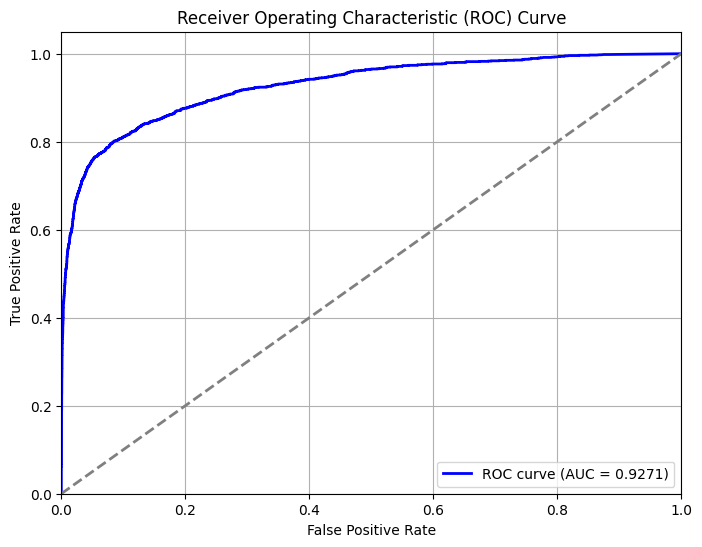

In [100]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a classification problem
    eval_metric='logloss',
    use_label_encoder=False
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\thebe\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9368
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10059
           1       0.84      0.69      0.76      1670

    accuracy                           0.94     11729
   macro avg       0.89      0.83      0.86     11729
weighted avg       0.93      0.94      0.93     11729



C:\Users\thebe\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.9385284337965726
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10059
           1       0.85      0.69      0.76      1670

    accuracy                           0.94     11729
   macro avg       0.90      0.84      0.86     11729
weighted avg       0.94      0.94      0.94     11729



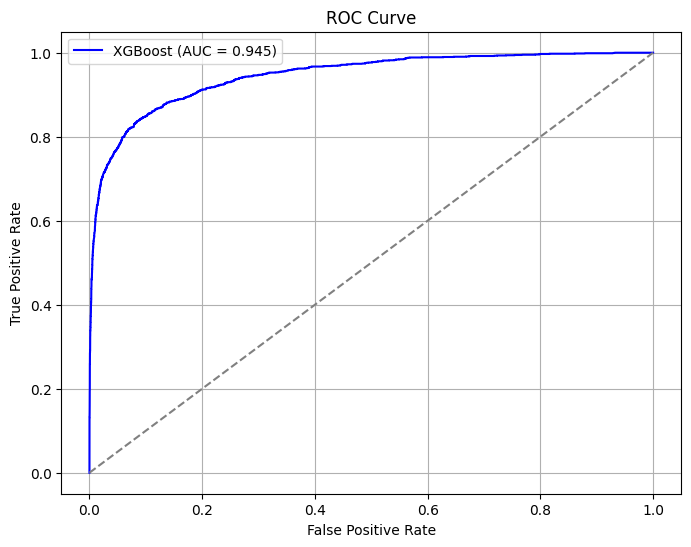

In [140]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators = 50,learning_rate=0.2,reg_lambda=1)

# Train the model
xgb.fit(X_train, y_train)

# Predictions
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]  # Probability for ROC curve

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [141]:
X6.shape

(58645, 7)

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the test dataset
df_test = pd.read_csv("../Loan Dataset/test.csv")

# Define category mappings (same as in training)
home_ownership_map = {"OTHER": 0, "RENT": 1, "MORTGAGE": 2, "OWN": 3}
loan_grade_map = {"G": 0, "F": 1, "E": 2, "D": 3, "C": 4, "B": 5, "A": 6}
loan_intent_map = {"VENTURE": 0, "PERSONAL": 1, "MEDICAL": 2, "HOMEIMPROVEMENT": 3, "DEBTCONSOLIDATION": 4, "EDUCATION": 5}
default_map = {"N": 0, "Y": 1}

# Apply mappings to the test data
df_test["person_home_ownership"] = df_test["person_home_ownership"].map(home_ownership_map)
df_test["loan_grade"] = df_test["loan_grade"].map(loan_grade_map)
df_test["loan_intent"] = df_test["loan_intent"].map(loan_intent_map)
df_test["cb_person_default_on_file"] = df_test["cb_person_default_on_file"].map(default_map)

# Drop unnecessary columns (same as in training)
X_test_processed = df_test.drop(columns=["id", "person_age", "cb_person_cred_hist_length", "loan_intent", "person_emp_length", "loan_grade", "loan_amnt"])

# Feature engineering (same as in training)
X_test_processed["total_loan_cost"] = df_test["loan_amnt"] * (1 + df_test["loan_int_rate"])
X_test_processed["risk_factor"] = df_test["loan_grade"] * (df_test["cb_person_default_on_file"] + 1)

# Assuming 'scaler' from training is available
#X_test_scaled = pd.DataFrame(scaler.transform(X_test_processed), columns=X_test_processed.columns)


# Use the same scaler that was fit on the training data
scaler = StandardScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_processed), columns = X_test_processed.columns)

# Now X_test_scaled is ready to be used for prediction.

In [148]:

# Predict on the processed test data
predictions = xgb.predict(X_test_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({'id': df_test['id'], 'loan_status': predictions})

# Save the submission to a CSV file
submission.to_csv('../Loan Dataset/submission.csv', index=False)